# **Predicción de Calidad del Vino (Core)**

#  1. Carga y Exploración de Datos:

* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

**- Cargar el dataset y revisar su estructura básica.**

In [1]:
import numpy as np
import pandas as pd
import glob
import zipfile

In [2]:
df = pd.read_csv('/content/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0




> Cargamos el Dataset y con el método info() apreciamos que el mismo solo cuenta con vales numéricos y no se aprecia valores nulos



**- Describir las variables y su distribución.**

In [5]:
# Estadísticas descriptivas de las variables numéricas
df = df.drop(columns='Id')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> Para describir las variables utilice el método describe() que proporciona estadísticas como la media, la desviación estándar, y los percentiles para cada columna numérica



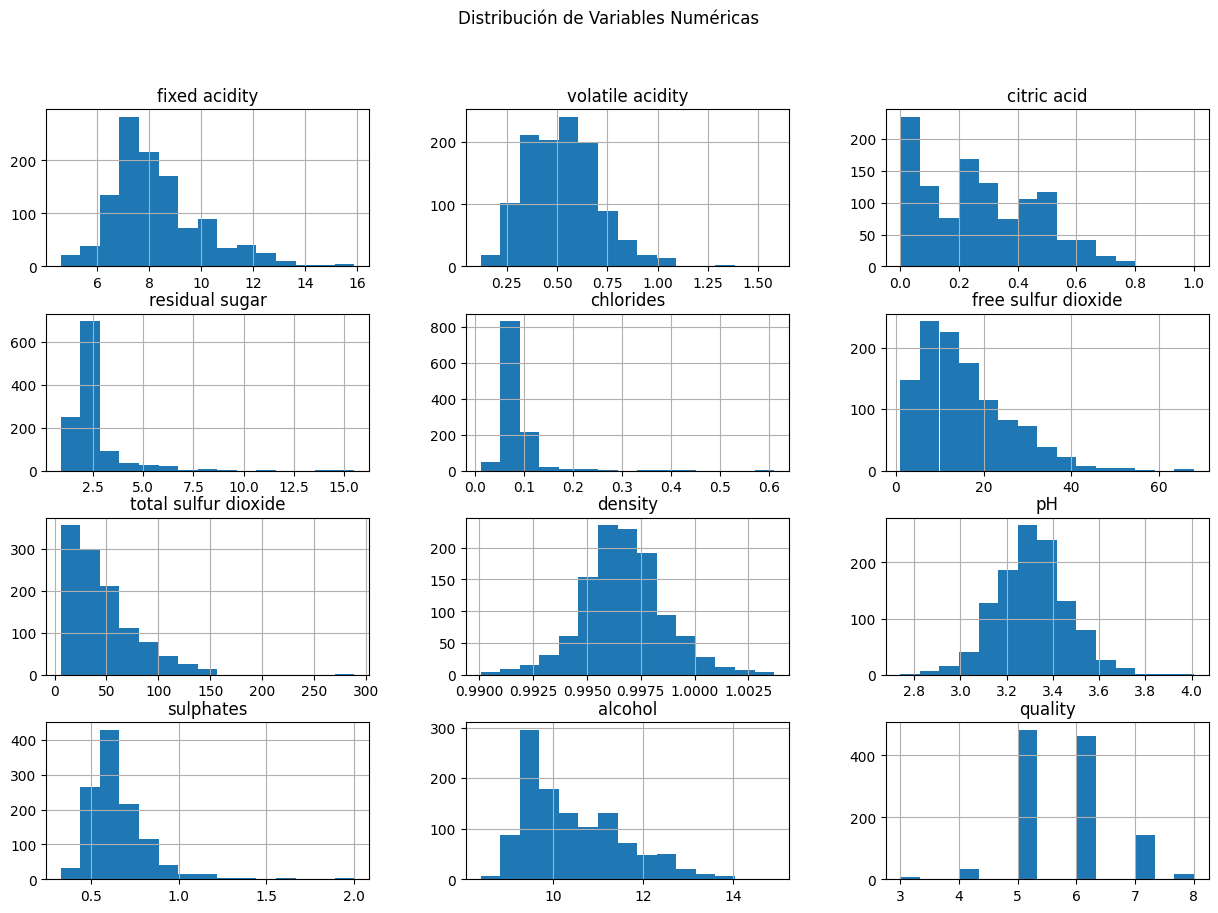

In [6]:
# Para ver la distribución de cada variable individualmente
import matplotlib.pyplot as plt

# Crear histogramas para cada columna numérica
df.hist(bins=15, figsize=(15,10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

> Para ver la distribución de cada variable individualmente, utilice los gráficos de histogramas




**- Identificar y tratar valores nulos y outliers.**




In [7]:
# Identificamos todas las columnas numéricas
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, num_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 309
Porcentaje de outliers: 27.03%


In [8]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (1143, 12)
Tamaño del DataFrame sin outliers: (834, 12)


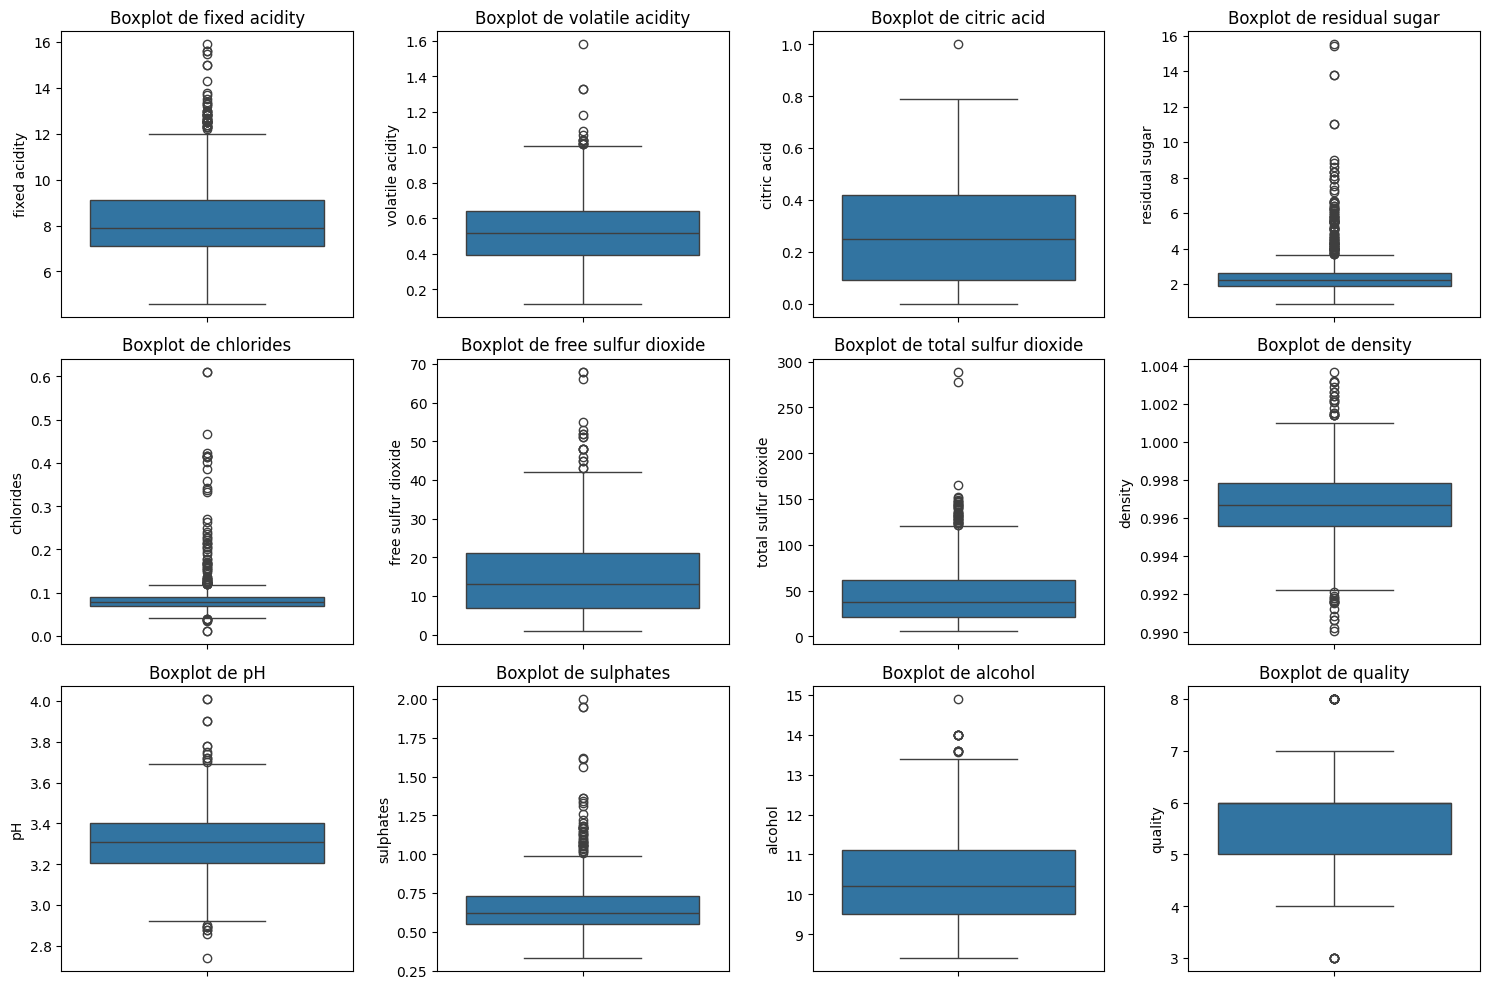

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Detectar outliers con boxplots para variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(df, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()



> Se observa que tenemos un 27.03% de datos outliers, y con la extracción de esos datos nos quedamos con 834 registros de 1143. En el gráfico de Boxplot podemos apreciar mejor la distribución de los datos outliers.



#  2. Preprocesamiento de Datos: **Análisis 1**

* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Selección de características importantes.
df_transformed = df_no_outliers.copy()
df_transformed = df_transformed.select_dtypes(include=['float64', 'int64'])

# Separar las características (X) y la variable objetivo (y)
X = df_transformed.drop(columns = 'quality')
y = df_transformed['quality']



> Para este ejercicio "Transformar variables categóricas en variables numéricas si es necesario." no se aplica ya que todos los datos de análisis son datos numéricos



In [20]:
# Dividir los datos en conjunto de entrenamiento (70%) y de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73, stratify=y)
print(y_test.value_counts())
print(y_train.value_counts())

quality
5    109
6    108
7     28
4      6
Name: count, dtype: int64
quality
5    253
6    251
7     66
4     13
Name: count, dtype: int64


In [21]:
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#  3. Entrenamiento de Modelos de Clasificación: **Análisis 1**

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**K-Nearest Neighbors (KNN):**

In [23]:
# Configuración de hiperparámetros para KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Crear modelo KNN
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3)
knn_grid.fit(X_train, y_train)

print("Mejores parámetros para KNN:", knn_grid.best_params_)
print("Mejor puntaje de validación cruzada para KNN:", knn_grid.best_score_)

Mejores parámetros para KNN: {'n_neighbors': 9}
Mejor puntaje de validación cruzada para KNN: 0.5146268393691075


**Bosques aleatorios**

In [24]:
# Configuración de hiperparámetros para Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}

# Crear modelo Random Forest
rf = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(rf, rf_params, cv=4)
rf_grid.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", rf_grid.best_params_)
print("Mejor puntaje de validación cruzada para Random Forest:", rf_grid.best_score_)

Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 100}
Mejor puntaje de validación cruzada para Random Forest: 0.6980987246102975


**Regresión Logística**

In [25]:
# Configuración de hiperparámetros para Regresión Logística
logreg_params = {'C': [0.1, 1, 10, 100]}

# Crear modelo de Regresión Logística con max_iter aumentado
logreg = LogisticRegression(random_state=42, max_iter=500, solver='lbfgs')
logreg_grid = GridSearchCV(logreg, logreg_params, cv=4)
logreg_grid.fit(X_train_scaled, y_train)

print("Mejores parámetros para Regresión Logística:", logreg_grid.best_params_)
print("Mejor puntaje de validación cruzada para Regresión Logística:", logreg_grid.best_score_)

Mejores parámetros para Regresión Logística: {'C': 0.1}
Mejor puntaje de validación cruzada para Regresión Logística: 0.6330066131317903


**Validación Cruzada**

In [27]:
# Predecir y evaluar con el mejor modelo de cada clasificación
knn_best = knn_grid.best_estimator_
rf_best = rf_grid.best_estimator_
logreg_best = logreg_grid.best_estimator_

print("Precisión en el conjunto de prueba para KNN:", accuracy_score(y_test, knn_best.predict(X_test)))
print("Precisión en el conjunto de prueba para Random Forest:", accuracy_score(y_test, rf_best.predict(X_test)))
print("Precisión en el conjunto de prueba para Regresión Logística:", accuracy_score(y_test, logreg_best.predict(X_test.values)))

Precisión en el conjunto de prueba para KNN: 0.4940239043824701
Precisión en el conjunto de prueba para Random Forest: 0.6733067729083665
Precisión en el conjunto de prueba para Regresión Logística: 0.5139442231075697




> Con el entrenamiento de tres modelos KNN, Bosques aleatorios, y Regresión Logística y la validación cruzada de los modelos podemos llegar a la conclusión que la precisión del modelo de Bosques aleatorios es la más alta entre los tres modelos, con un valor de aproximadamente 0.69 para entrenamiento y 0.67 para prueba




 # 4. Evaluación de Modelos: **Análisis 1**

* Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
* Generar un informe de clasificación para cada modelo.
* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


Evaluación para KNN:
Exactitud (Accuracy): 0.4940239043824701
Precisión (Precision): 0.4606185620634557
Recall: 0.4940239043824701
F1-Score: 0.4698699838142069
Matriz de Confusión:
 [[ 0  3  3  0]
 [ 0 68 38  3]
 [ 0 51 54  3]
 [ 0  7 19  2]]

Informe de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.53      0.62      0.57       109
           6       0.47      0.50      0.49       108
           7       0.25      0.07      0.11        28

    accuracy                           0.49       251
   macro avg       0.31      0.30      0.29       251
weighted avg       0.46      0.49      0.47       251



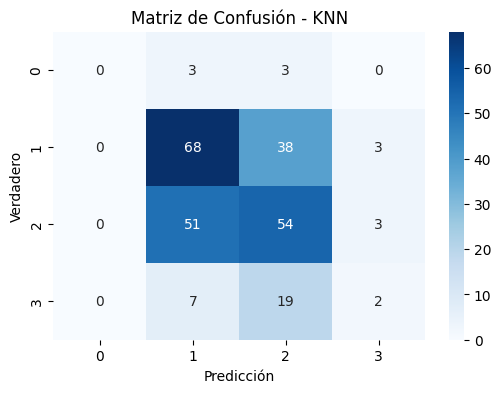


Evaluación para Random Forest:
Exactitud (Accuracy): 0.6733067729083665
Precisión (Precision): 0.6565205843293492
Recall: 0.6733067729083665
F1-Score: 0.6605447403992354
Matriz de Confusión:
 [[ 0  5  1  0]
 [ 0 85 22  2]
 [ 0 32 72  4]
 [ 0  3 13 12]]

Informe de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73       109
           6       0.67      0.67      0.67       108
           7       0.67      0.43      0.52        28

    accuracy                           0.67       251
   macro avg       0.50      0.47      0.48       251
weighted avg       0.66      0.67      0.66       251



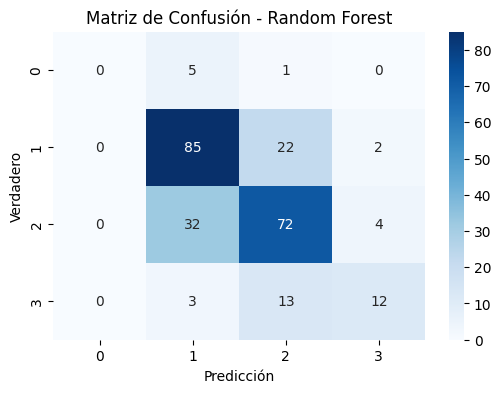


Evaluación para Logistic Regression:
Exactitud (Accuracy): 0.5139442231075697
Precisión (Precision): 0.6043097292571756
Recall: 0.5139442231075697
F1-Score: 0.4557483756985984
Matriz de Confusión:
 [[ 0  1  5  0]
 [ 0 34 75  0]
 [ 0 14 94  0]
 [ 0  2 25  1]]

Informe de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.31      0.42       109
           6       0.47      0.87      0.61       108
           7       1.00      0.04      0.07        28

    accuracy                           0.51       251
   macro avg       0.53      0.30      0.28       251
weighted avg       0.60      0.51      0.46       251



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


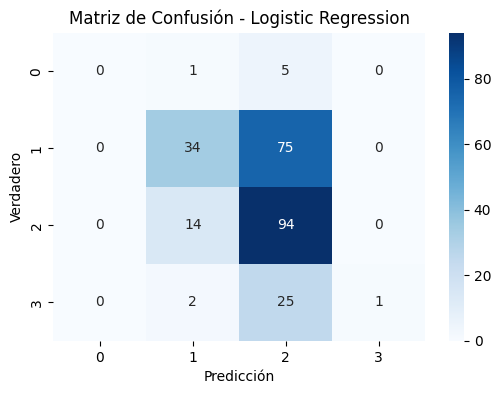

In [29]:
# Diccionario para almacenar los modelos y sus nombres
models = {'KNN': knn_best, 'Random Forest': rf_best, 'Logistic Regression': logreg_best}

# Evaluar y mostrar métricas para cada modelo
for name, model in models.items():
    print(f"\nEvaluación para {name}:")

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular y mostrar métricas
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precisión (Precision):", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # Generar y mostrar informe de clasificación
    print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

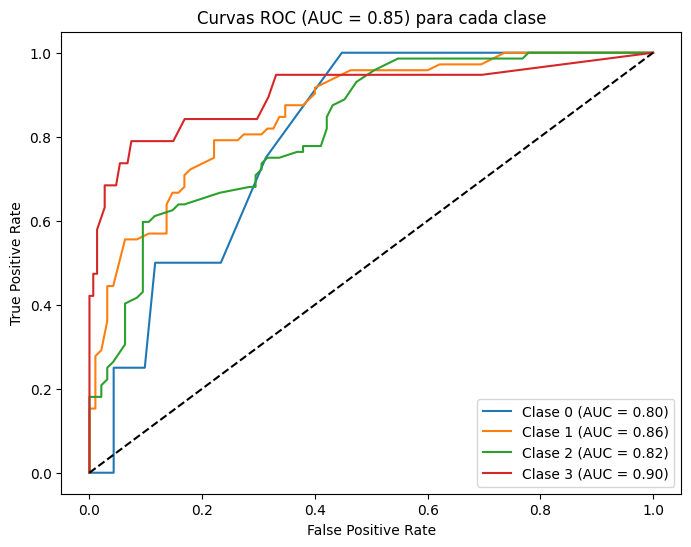

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
df_cal = df_no_outliers.copy()
df_cal = df_cal.select_dtypes(include=['float64', 'int64'])

# Dividir en X e y
X = df_cal.drop(columns='quality')
y = df_cal['quality']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predicción de probabilidades para cada clase
y_prob = model.predict_proba(X_test)

# Calcular el AUC para cada clase (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class="ovr")

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(roc_auc_dict)):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curvas ROC (AUC = {roc_auc:.2f}) para cada clase")
plt.legend(loc="lower right")
plt.show()



> En la evaluación y clasificación de los modelos podemos ver los distintos rendimientos acompañado de la visualización para una mejor compresión y donde se destaca más el modelo de bosques aleatorios. Pero en la clasificación se evidencia que la clase 4 tiene 0 precisión en todos los modelos por la cantidad de datos asignados para mejorar este rendimiento y clasificación vamos hacer un segundo análisis.



# 5. Análisis y Comparación de Resultados: **Análisis 1**

* Comparar el rendimiento de los diferentes modelos.
* Discutir cuál modelo ofrece el mejor rendimiento y por qué.
* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

>  - Comparación de Rendimiento:
* KNN (K-Nearest Neighbors): 0.4940 (49.40%)
* Random Forest: 0.6733 (67.33%)
* Regresión Logística: 0.5139 (51.39%)
>  - Mejor rendimiento y por qué:
* Random Forest muestra el mejor rendimiento con una precisión de 0.6733, lo que indica que tiene una mayor capacidad para clasificar correctamente los datos en comparación con los otros dos modelos.
>  - Fortalezas y debilidades:
* Random Forest y la Regresión Logística son los de mayor fortaleza ya que representa un mejor resultado.
* KNN tiene la peor precisión, con un 49.40%, lo que indica que no es capaz de generar una buena clasificación para este conjunto de datos en particular.

#  2. Preprocesamiento de Datos: **Análisis 2**

* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Selección de características importantes.
df_transformed_m2 = df_no_outliers.copy()
df_transformed_m2 = df_transformed.select_dtypes(include=['float64', 'int64'])

# Separar las características (X) y la variable objetivo (y)
X = df_transformed_m2.drop(columns = 'quality')
y = df_transformed_m2['quality']



> Para este ejercicio "Transformar variables categóricas en variables numéricas si es necesario." no se aplica ya que todos los datos de análisis son datos numéricos



In [57]:
# Contar las clases en el DataFrame original
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100  # Porcentaje de cada clase

# Combinar en un DataFrame para mejor presentación
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
}).reset_index()

# Renombrar las columnas
class_distribution.columns = ['Class', 'Count', 'Percentage']

# Imprimir la distribución de clases
print("Distribución de clases en el DataFrame original:")
print(class_distribution)

Distribución de clases en el DataFrame original:
   Class  Count  Percentage
0      5    362   43.405276
1      6    359   43.045564
2      7     94   11.270983
3      4     19    2.278177


In [58]:
# Crear un mapeo de las clases originales a las nuevas categorías
mapeo_clases = {
    4: 'Bajo',
    5: 'Bajo',
    6: 'Medio',
    7: 'Alto'
}

# Reasignar las clases en `y` usando el mapeo
y_agrupado = y.map(mapeo_clases)

# Verificar la nueva distribución de las clases agrupadas
print("Distribución después de la agrupación:")
print(y_agrupado.value_counts())

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_agrupado, test_size=0.3, random_state=73, stratify=y_agrupado)

# Aplicar SMOTE si es necesario al conjunto de entrenamiento
smote = SMOTE(random_state=73, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución después de aplicar SMOTE
print("\nDistribución en el conjunto de entrenamiento después de SMOTE:")
print(y_train_resampled.value_counts())

Distribución después de la agrupación:
quality
Bajo     381
Medio    359
Alto      94
Name: count, dtype: int64

Distribución en el conjunto de entrenamiento después de SMOTE:
quality
Bajo     266
Alto     266
Medio    266
Name: count, dtype: int64




> Recategorización de quality a nuevo nivel por agrupación para tener un mayor rango por cada clase y balanceado de datos para el entrenamiento de los datos.



In [59]:
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#  3. Entrenamiento de Modelos de Clasificación: **Análisis 2**

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**K-Nearest Neighbors (KNN):**

In [61]:
# Configuración de hiperparámetros para KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Crear modelo KNN
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3)
knn_grid.fit(X_train, y_train)

print("Mejores parámetros para KNN:", knn_grid.best_params_)
print("Mejor puntaje de validación cruzada para KNN:", knn_grid.best_score_)

Mejores parámetros para KNN: {'n_neighbors': 5}
Mejor puntaje de validación cruzada para KNN: 0.5265838399859019


**Bosques aleatorios**

In [62]:
# Configuración de hiperparámetros para Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}

# Crear modelo Random Forest
rf = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(rf, rf_params, cv=4)
rf_grid.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", rf_grid.best_params_)
print("Mejor puntaje de validación cruzada para Random Forest:", rf_grid.best_score_)

Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 150}
Mejor puntaje de validación cruzada para Random Forest: 0.6758266414737837


**Regresión Logística**

In [63]:
# Configuración de hiperparámetros para Regresión Logística
logreg_params = {'C': [0.1, 1, 10, 100]}

# Crear modelo de Regresión Logística con max_iter aumentado
logreg = LogisticRegression(random_state=42, max_iter=500, solver='lbfgs')
logreg_grid = GridSearchCV(logreg, logreg_params, cv=4)
logreg_grid.fit(X_train_scaled, y_train)

print("Mejores parámetros para Regresión Logística:", logreg_grid.best_params_)
print("Mejor puntaje de validación cruzada para Regresión Logística:", logreg_grid.best_score_)

Mejores parámetros para Regresión Logística: {'C': 0.1}
Mejor puntaje de validación cruzada para Regresión Logística: 0.6621162021728861


**Validación Cruzada**

In [64]:
# Predecir y evaluar con el mejor modelo de cada clasificación
knn_best = knn_grid.best_estimator_
rf_best = rf_grid.best_estimator_
logreg_best = logreg_grid.best_estimator_


print("Precisión en el conjunto de prueba para KNN:", accuracy_score(y_test, knn_best.predict(X_test)))
print("Precisión en el conjunto de prueba para Random Forest:", accuracy_score(y_test, rf_best.predict(X_test)))
print("Precisión en el conjunto de prueba para Regresión Logística:", accuracy_score(y_test, logreg_best.predict(X_test.values)))

Precisión en el conjunto de prueba para KNN: 0.5537848605577689
Precisión en el conjunto de prueba para Random Forest: 0.6733067729083665
Precisión en el conjunto de prueba para Regresión Logística: 0.5179282868525896




> Con el entrenamiento de tres modelos KNN, Bosques aleatorios, y Regresión Logística y la validación cruzada de los modelos podemos llegar a la conclusión que la precisión del modelo de Bosques aleatorios es la más alta entre los tres modelos, con un valor de aproximadamente 0.67




 # 4. Evaluación de Modelos: **Análisis 2**

* Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
* Generar un informe de clasificación para cada modelo.
* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


Evaluación para KNN:
Exactitud (Accuracy): 0.5537848605577689
Precisión (Precision): 0.543459260422572
Recall: 0.5537848605577689
F1-Score: 0.5444278747889607
Matriz de Confusión:
 [[ 9  5 14]
 [ 2 83 30]
 [12 49 47]]

Informe de Clasificación:
               precision    recall  f1-score   support

        Alto       0.39      0.32      0.35        28
        Bajo       0.61      0.72      0.66       115
       Medio       0.52      0.44      0.47       108

    accuracy                           0.55       251
   macro avg       0.50      0.49      0.49       251
weighted avg       0.54      0.55      0.54       251



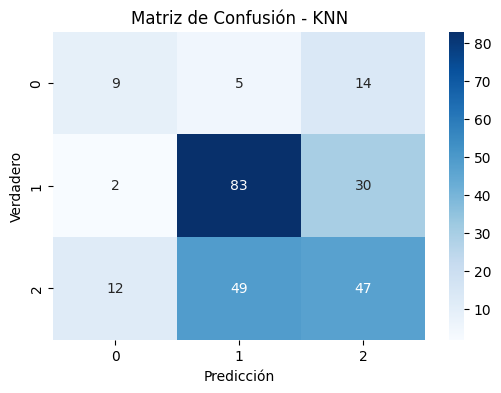


Evaluación para Random Forest:
Exactitud (Accuracy): 0.6733067729083665
Precisión (Precision): 0.6790334889702127
Recall: 0.6733067729083665
F1-Score: 0.6716081268794554
Matriz de Confusión:
 [[13  1 14]
 [ 0 84 31]
 [ 4 32 72]]

Informe de Clasificación:
               precision    recall  f1-score   support

        Alto       0.76      0.46      0.58        28
        Bajo       0.72      0.73      0.72       115
       Medio       0.62      0.67      0.64       108

    accuracy                           0.67       251
   macro avg       0.70      0.62      0.65       251
weighted avg       0.68      0.67      0.67       251



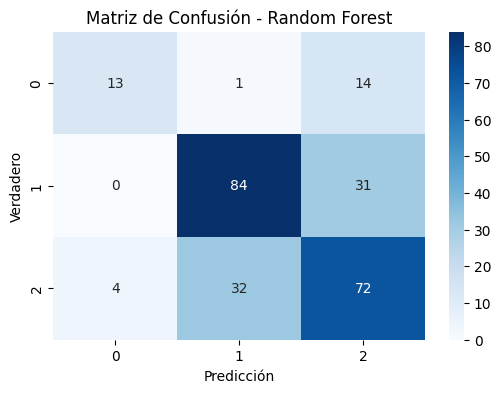


Evaluación para Logistic Regression:
Exactitud (Accuracy): 0.5179282868525896
Precisión (Precision): 0.48246983716445346
Recall: 0.5179282868525896
F1-Score: 0.4832233111350219
Matriz de Confusión:
 [[ 0  3 25]
 [ 0 52 63]
 [ 0 30 78]]

Informe de Clasificación:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00        28
        Bajo       0.61      0.45      0.52       115
       Medio       0.47      0.72      0.57       108

    accuracy                           0.52       251
   macro avg       0.36      0.39      0.36       251
weighted avg       0.48      0.52      0.48       251



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


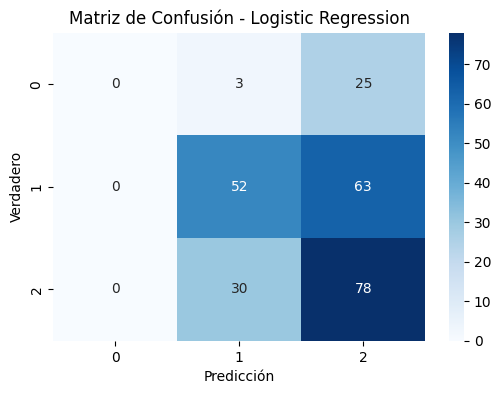

In [66]:
# Diccionario para almacenar los modelos y sus nombres
models = {'KNN': knn_best, 'Random Forest': rf_best, 'Logistic Regression': logreg_best}

# Evaluar y mostrar métricas para cada modelo
for name, model in models.items():
    print(f"\nEvaluación para {name}:")

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular y mostrar métricas
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precisión (Precision):", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # Generar y mostrar informe de clasificación
    print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

Distribución después de la agrupación:
quality
Bajo     381
Medio    359
Alto      94
Name: count, dtype: int64
Distribución en y_test después de la división:
quality
Bajo     115
Medio    108
Alto      28
Name: count, dtype: int64


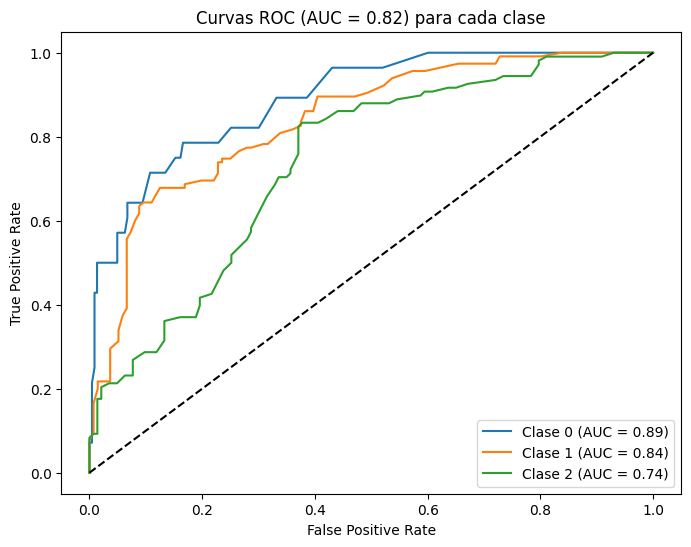

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
df_cal = df_no_outliers.copy()
df_cal = df_cal.select_dtypes(include=['float64', 'int64'])

# Dividir en X e y
X = df_cal.drop(columns='quality')
y = df_cal['quality']

# Crear un mapeo de las clases originales a las nuevas categorías
mapeo_clases = {
    4: 'Bajo',
    5: 'Bajo',
    6: 'Medio',
    7: 'Alto'
}

# Reasignar las clases en `y` usando el mapeo
y_agrupado = y.map(mapeo_clases)

# Verificar la nueva distribución de las clases agrupadas
print("Distribución después de la agrupación:")
print(y_agrupado.value_counts())

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_agrupado, test_size=0.3, random_state=73, stratify=y_agrupado)

# Aplicar SMOTE si es necesario al conjunto de entrenamiento
smote = SMOTE(random_state=73, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución en y_test después de la división:")
print(y_test.value_counts())

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predicción de probabilidades para cada clase
y_prob = model.predict_proba(X_test)

# Calcular el AUC para cada clase (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=sorted(y_agrupado.unique()))
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class="ovr")

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(roc_auc_dict)):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curvas ROC (AUC = {roc_auc:.2f}) para cada clase")
plt.legend(loc="lower right")
plt.show()

# 5. Análisis y Comparación de Resultados: **Análisis 2**

* Comparar el rendimiento de los diferentes modelos.
* Discutir cuál modelo ofrece el mejor rendimiento y por qué.
* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

>  - Comparación de Rendimiento:
* KNN (K-Nearest Neighbors): 0.5537 (55.37%)
* Random Forest: 0.6733 (67.33%)
* Regresión Logística: 0.5179 (51.79%)
>  - Mejor rendimiento y por qué:
* Random Forest muestra el mejor rendimiento con una precisión de 0.6733, lo que indica que tiene una mayor capacidad para clasificar correctamente los datos en comparación con los otros dos modelos.
>  - Fortalezas y debilidades:
* Random Forest y el KNN son los de mayor fortaleza ya que representa un mejor resultado.
* Regresión Logística tiene la peor precisión, con un 51.79%, lo que indica que no es capaz de generar una buena clasificación para este conjunto de datos en particular.



> **En este segundo análisis pudimos corregir las clasificaciones pero no mejoro el rendimiento de todos los modelos, el KNN y Regresión logística mejorar en comparación con el primer análisis pero el modelo Bosques aleatorio mantuvo en mismo result.**



# 6. Repositorio en GitHub:

* Crear un repositorio en GitHub con el código y los resultados del análisis.
* Crear un tag de liberación con una breve descripción de la versión final del proyecto.